170498071/170498071 [==============================] - 6s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                       

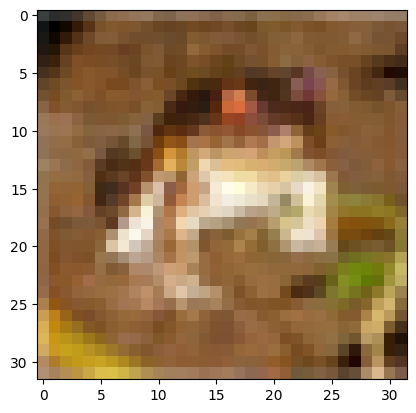

1/1 [==============================] - 0s 111ms/step
Predicted Class: 3


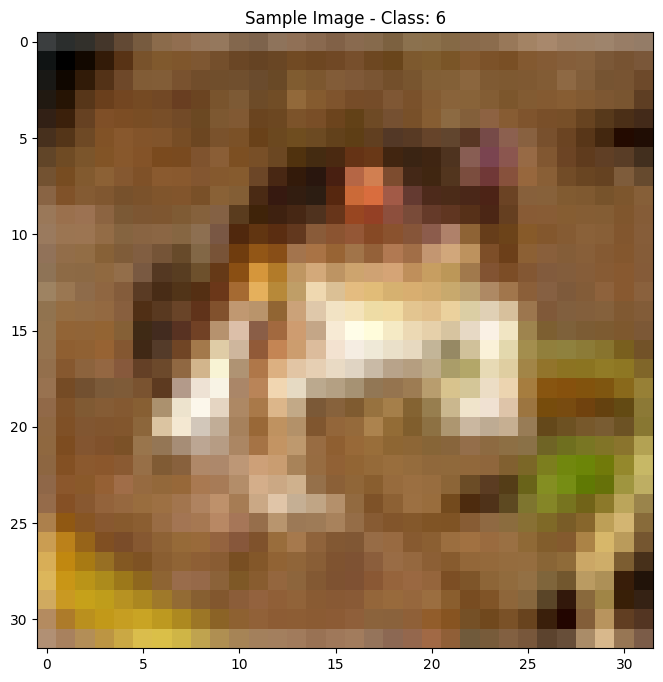

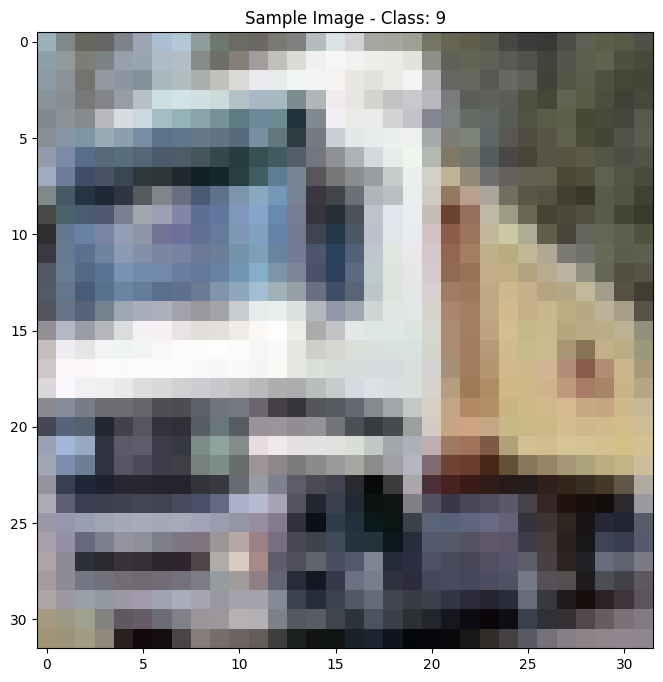

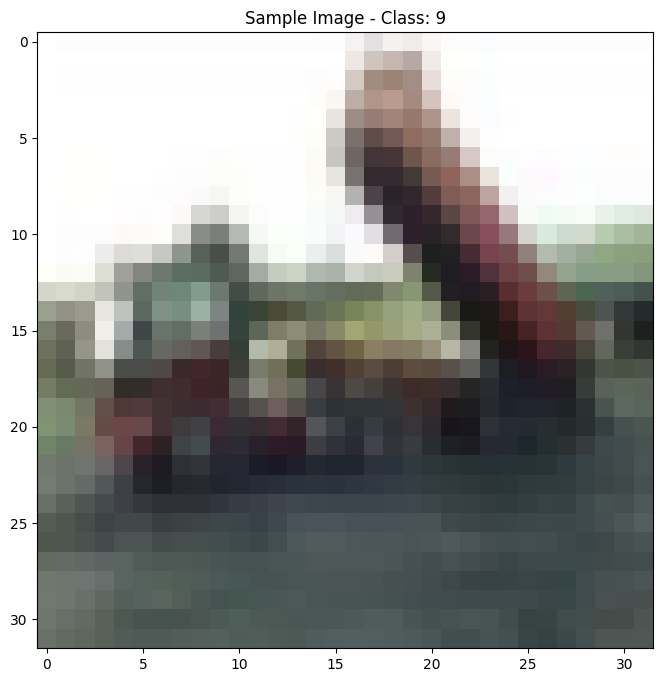

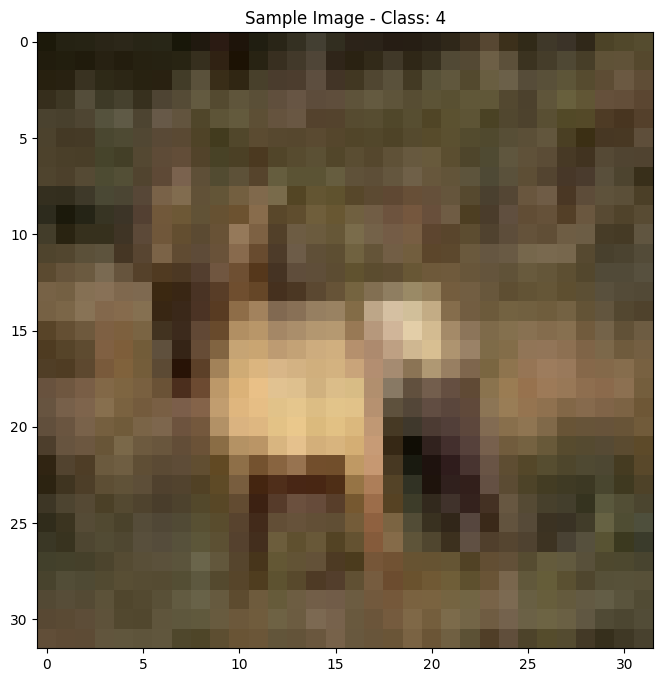

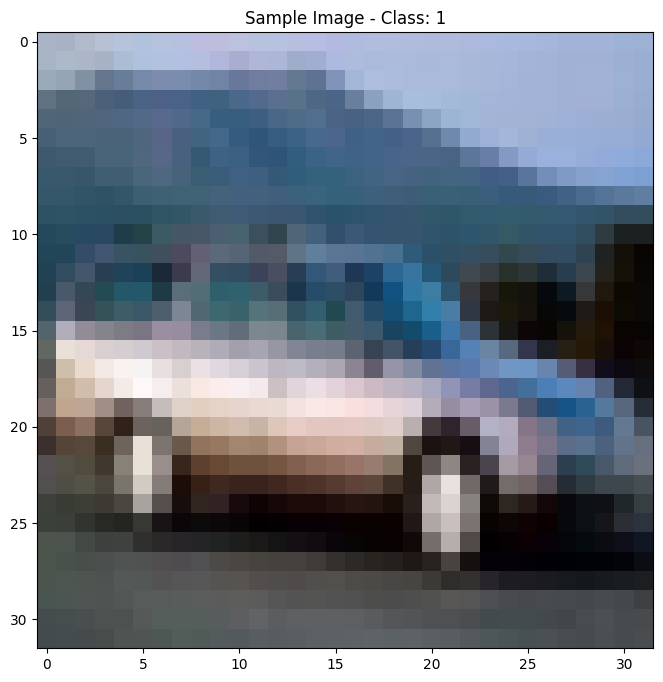

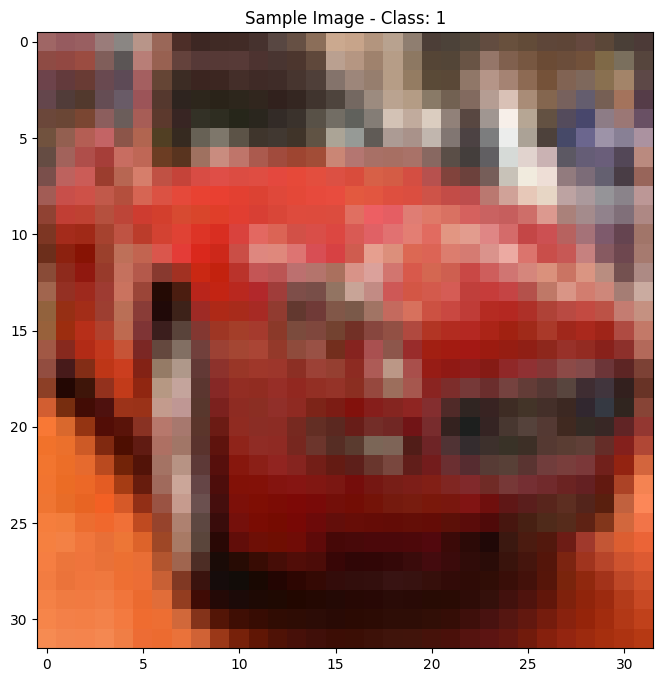

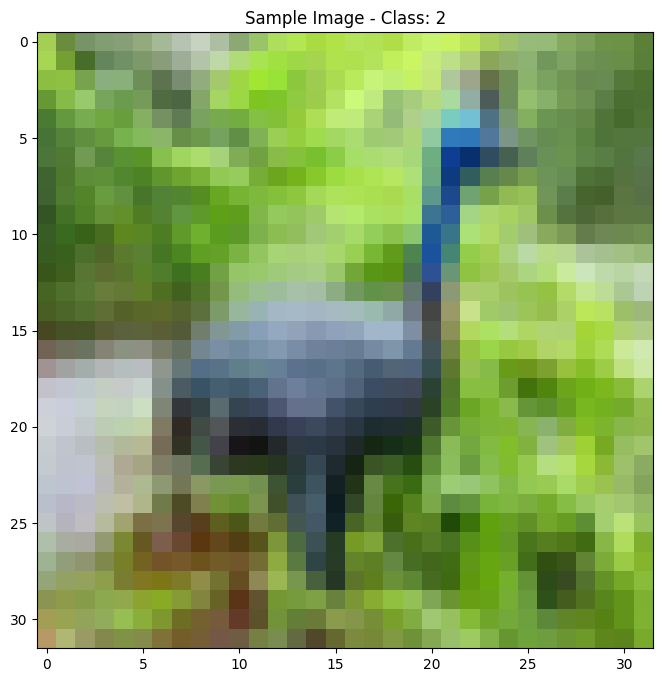

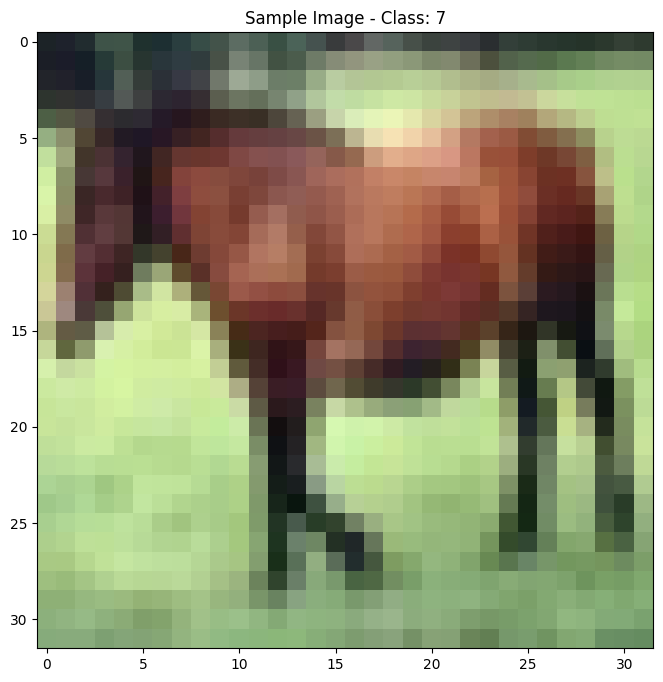

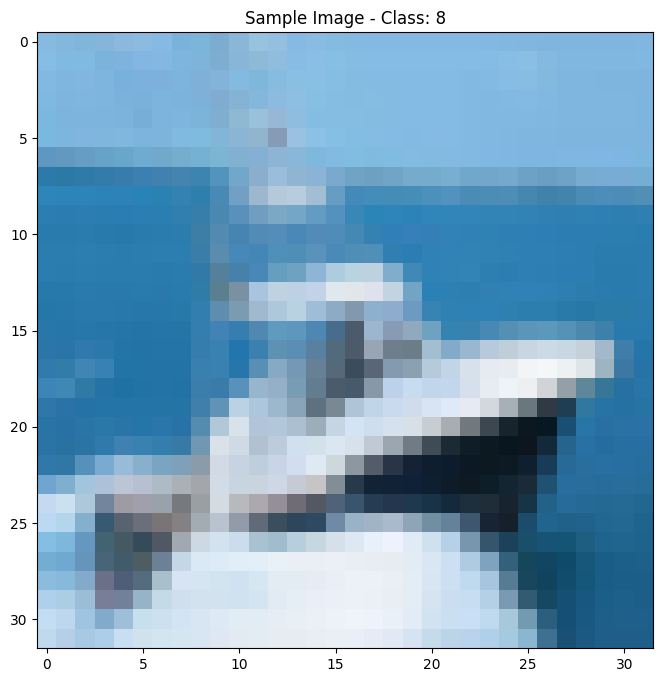

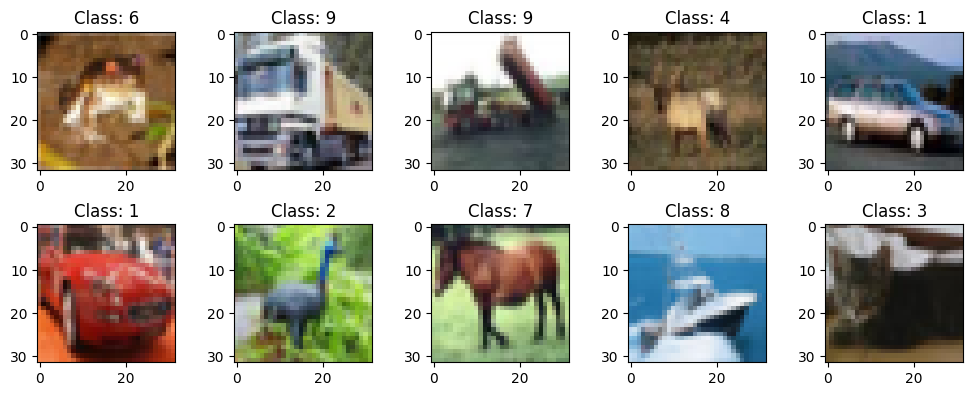

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the pixel values to be in the range [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Define the model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=1, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model's performance
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {:.3f}".format(test_loss))
print("Test Accuracy: {:.3f}".format(test_acc))

# Showing an example image from the dataset
sample_image = x_train[0]
plt.imshow(sample_image)
plt.show()

# Predict the class of the sample image
sample_image = sample_image.reshape(1, 32, 32, 3)
predictions = model.predict(sample_image)
predicted_class = np.argmax(predictions)
print("Predicted Class: {}".format(predicted_class))
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [8, 8]  # Adjust the figure size
plt.rcParams['image.cmap'] = 'viridis'   # Use a different color map for better contrast

# Display a few sample images
num_images_to_display = 9

for i in range(num_images_to_display):
    sample_image = x_train[i]
    plt.imshow(sample_image)
    plt.title("Sample Image - Class: {}".format(y_train[i][0]))
    plt.show()

import matplotlib.pyplot as plt

# Define the number of rows and columns for the grid
num_rows = 2
num_columns = 5  # Change this to the desired number of columns

# Create a figure with a grid of subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(10, 4))  # Adjust the figure size as needed

# Display multiple sample images
for i in range(num_rows):
    for j in range(num_columns):
        index = i * num_columns + j
        sample_image = x_train[index]
        axes[i, j].imshow(sample_image)
        axes[i, j].set_title("Class: {}".format(y_train[index][0]))

# Adjust spacing and display the plot
plt.tight_layout()
plt.show()